<a href="https://colab.research.google.com/github/GurnishKaur/Machine-Learning/blob/main/Introduction_to_Pandas_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`What is Pandas library and why we use it?`



---




```
Pandas is an open source Python package that is most widely used for data science and machine learning tasks. 

Pandas library makes it simple to do many of the time consuming tasks which are associated with working with data, including:

1. Data cleansing
2. Data fill
3. Data normalization
4. Merges and joins
5. Data visualization
6. Statistical analysis
7. Data inspection
8. Loading and saving data
```


---




In [ ]:
data = {"a" : 1}

<class 'tuple'>


#  `Examples`

In [ ]:
# import library

import pandas as pd

In [ ]:
dictionary = {
    'grade7': [3, 2, 0, 1], 
    'grade8': [0, 3, 7, 2]
}

In [ ]:
# creating the dataframe from dictionary
purchases = pd.DataFrame(dictionary)

purchases

,grade7,grade8
0,3,0
1,2,3
2,0,7
3,1,2


In [ ]:
purchases.to_csv("marks.csv")

In [ ]:
purchases = pd.DataFrame(data, index=['Alex', 'Bob', 'William', 'Whitney'])

purchases

,grade7,grade8
Alex,3,0
Bob,2,3
William,0,7
Whitney,1,2


In [ ]:
# reading the dataset from any csv file

df = pd.read_csv("/content/marks.csv", index_col=0)

In [ ]:
df

,grade7,grade8
Alex,3,0
Bob,2,3
William,0,7
Whitney,1,2


In [ ]:
# getting information about your data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Alex to Whitney
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   grade7  4 non-null      int64
 1   grade8  4 non-null      int64
dtypes: int64(2)
memory usage: 268.0+ bytes


In [ ]:
# getting the shape of your dataset
df.shape

(4, 2)

In [ ]:
# dropping the duplicates within your dataset

temporary_dataset = df.drop_duplicates()
temporary_dataset.shape

(4, 2)

In [ ]:
# getting all the columns of your dataset

df.columns

Index(['grade7', 'grade8'], dtype='object')

In [ ]:
# finding the null values in your dataset

df.isnull()

,grade7,grade8
Alex,False,False
Bob,False,False
William,False,False
Whitney,False,False


In [ ]:
# removing the null values in your dataset

df.dropna()

,grade7,grade8
Alex,3,0
Bob,2,3
William,0,7
Whitney,1,2


In [ ]:
mean_dataset = df.mean()

In [ ]:
mean_dataset

grade7    1.5
grade8    3.0
dtype: float64

In [ ]:
# summary of distribution of the dataset

df.describe()

,grade7,grade8
count,4.000000,4.00000
mean,1.500000,3.00000
std,1.290994,2.94392
min,0.000000,0.00000
25%,0.750000,1.50000
50%,1.500000,2.50000
75%,2.250000,4.00000
max,3.000000,7.00000


In [ ]:
# relationship between the variables in your dataset
df.corr()

,grade7,grade8
grade7,1.000000,-0.877058
grade8,-0.877058,1.000000


In [ ]:
# reading dataset by rows

rows_df = df.loc["Bob"]
rows_df

grade7    2
grade8    3
Name: Bob, dtype: int64

In [ ]:
# conditional selection of the dataset; boolean condition

condition = (df["grade7"] == 3)

In [ ]:
condition.head()

Alex        True
Bob        False
William    False
Whitney    False
Name: grade7, dtype: bool

## `Exploratory Data Analysis`






---


`Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.`

`EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate.`


---





In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats

import seaborn as sns

from IPython.display import HTML, display

from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [ ]:
dataset = pd.read_csv('/content/housing-dataset.csv')

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


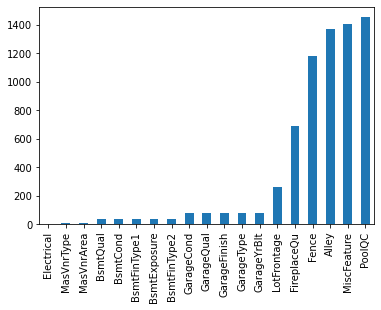

In [ ]:
missing = dataset.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

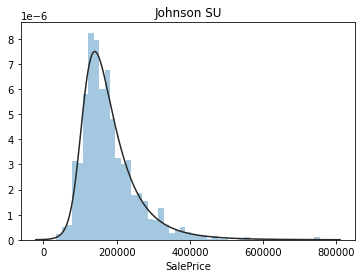

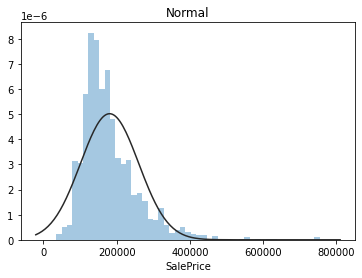

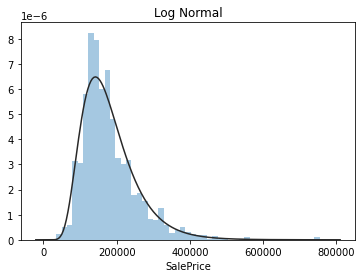

In [ ]:
import scipy.stats as st
y = dataset['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [ ]:
quantitative = [f for f in dataset.columns if dataset.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in dataset.columns if dataset.dtypes[f] == 'object']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

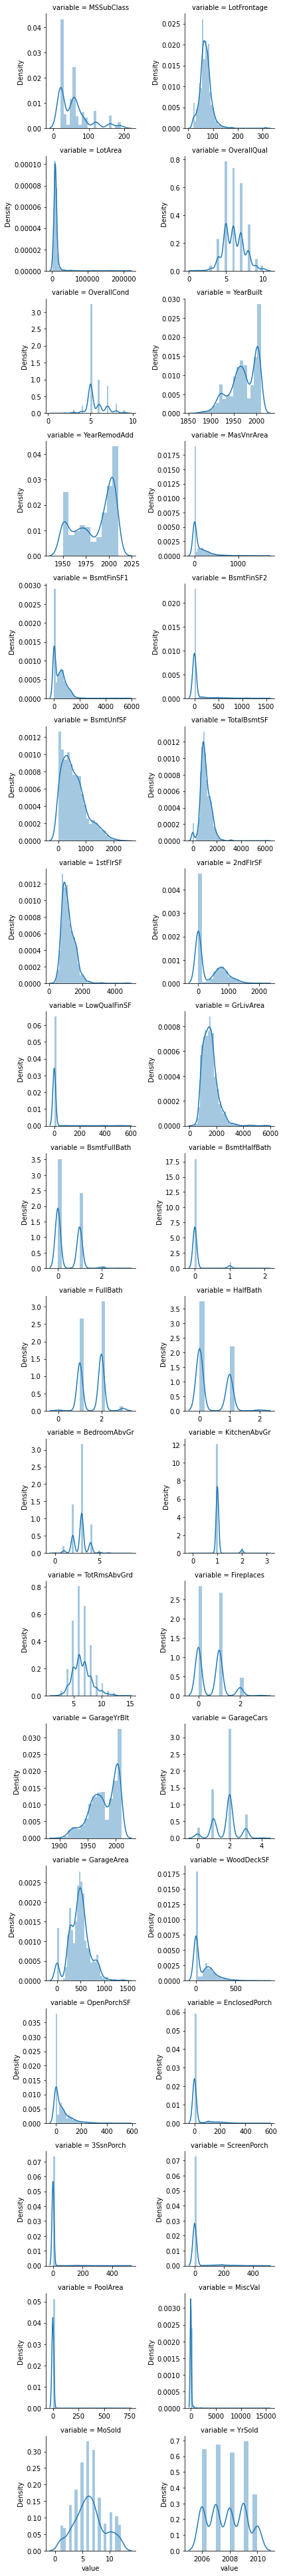

In [ ]:
f = pd.melt(dataset, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


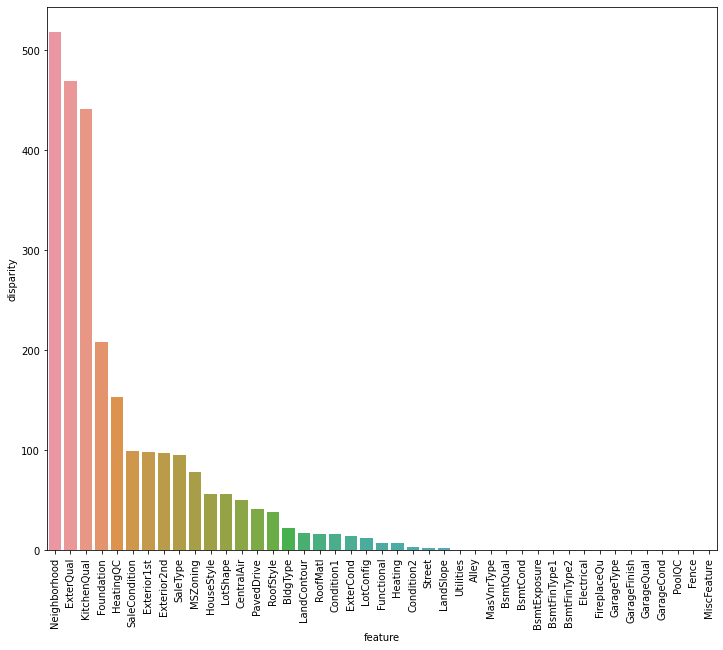

In [ ]:
plt.figure(figsize=(12,10)) 
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(dataset)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)